In [2]:
import numpy as np
import unicodecsv
import matplotlib.pylab as plt

with open('sample.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    recommendations = list(reader)
recommendations[0]

OrderedDict([('recommendation_id', '0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c'),
             ('created_at', '2017-09-01 00:32:25'),
             ('tasker_id', '1009185352'),
             ('position', '1'),
             ('hourly_rate', '38'),
             ('num_completed_tasks', '151'),
             ('hired', '0'),
             ('category', 'Furniture Assembly')])

In [3]:
# 1. How many recommendation sets are in this data sample?
recommendation_id_counts = dict()

for recommend in recommendations:
    recommendation_id_counts[recommend['recommendation_id']] = recommendation_id_counts.get(recommend['recommendation_id'], 0) + 1
print('Total recommendation sets:', len(recommendation_id_counts))

Total recommendation sets: 2100


In [4]:
# 2. Each recommendation set shows from 1 to 15 Taskers, what is:
#    - average number of Taskers shown
#    - median  number of Taskers shown

tasker_counts_array = np.array(list(recommendation_id_counts.values()))
print('Average numer of Taskers:', np.mean(tasker_counts_array))
print('Median number of Taskers: ', np.median(tasker_counts_array))

Average numer of Taskers: 14.2857142857
Median number of Taskers:  15.0


In [5]:
# 3. How many total unique Taskers are there in this data sample?
tasker_counts = dict()
for recommend in recommendations:
    tasker_counts[recommend['tasker_id']] = tasker_counts.get(recommend['tasker_id'], 0) + 1

print('Total unique Taskers:', len(tasker_counts))

Total unique Taskers: 830


In [6]:
# 4. Which Tasker has been shown the most?
#    Which Tasker has been shown the least?
import operator
sorted_taskers = sorted(tasker_counts.items(), key=operator.itemgetter(1))
# print(sorted_taskers)  
print('Tasker has been shown the least:', sorted_taskers[0]) #There are many other taskers with 1 shown 
print('Tasker has been shown the most:', sorted_taskers[-1])

Tasker has been shown the least: ('1011985968', 1)
Tasker has been shown the most: ('1014508755', 608)


In [7]:
# 5. Which Tasker has been hired the most?
#    Which Tasker has been hired the least?
hire_counts = dict()
for recommend in recommendations:
    hire_counts[recommend['tasker_id']] = hire_counts.get(recommend['tasker_id'], 0) + int(recommend['hired'])
sorted_hire = sorted(hire_counts.items(), key=operator.itemgetter(1))
# print(sorted_hire)
print('Tasker with the most hire:', sorted_hire[-1])
print('Tasker with the least hire:', sorted_hire[0]) # There are many other taskers with zero hire

Tasker with the most hire: ('1012043028', 59)
Tasker with the least hire: ('1013579273', 0)


In [8]:
# 6. If we define the "Tasker conversion rate" as the number of times a
#    Tasker has been hired, out of the number of times the Tasker has
#    been shown, how many Taskers have a conversion rate of 100%

conversion_rate = dict()
count = 0
for key in tasker_counts.keys():
    conversion_rate[key] = (hire_counts[key]/tasker_counts[key]) * 100
    if conversion_rate[key] == 100:
        count += 1
print('Number of Taskers with 100% conversion rate:', count)

Number of Taskers with 100% conversion rate: 6


In [9]:
# 7. Would it be possible for all Taskers to have a conversion rate of 100%
#    Please explain your reasoning.
#    No. It is because there is only 1 Tasker out of a set of recommendations can be hired.

In [10]:
# 8. For each category, what is the average position of the Tasker who is hired?
category_counts = dict()
for recommend in recommendations:
    category = recommend['category']
    if category not in category_counts: 
        category_counts[category] = list()
    if int(recommend['hired']) == 1:
        category_counts[category].append(int(recommend['position']))
for key, val in category_counts.items():
    print('Category:', key, '---', 'Average position:', np.mean(np.array(val)))

Category: Furniture Assembly --- Average position: 3.61188811189
Category: Moving Help --- Average position: 4.14535901926
Category: Mounting --- Average position: 4.59608540925


In [11]:
# 9. For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?
hourly_rate = dict()
completed_tasks = dict()
for recommend in recommendations:
    category = recommend['category']
    if category not in hourly_rate:
        hourly_rate[category] = list()
        completed_tasks[category] = list()
    if int(recommend['hired']) == 1:
        hourly_rate[category].append(int(recommend['hourly_rate']))
        completed_tasks[category].append(int(recommend['num_completed_tasks']))

for key, val in hourly_rate.items():
    print('Category:', key, '---', 'Average hourly rate:', np.mean(np.array(val)))
print()
for key, val in completed_tasks.items():
    print('Category:', key, '---', 'Average number of completed tasks:', np.mean(np.array(val)))

Category: Furniture Assembly --- Average hourly rate: 38.701048951
Category: Moving Help --- Average hourly rate: 63.0122591944
Category: Mounting --- Average hourly rate: 50.1548042705

Category: Furniture Assembly --- Average number of completed tasks: 249.020979021
Category: Moving Help --- Average number of completed tasks: 273.882661996
Category: Mounting --- Average number of completed tasks: 284.096085409


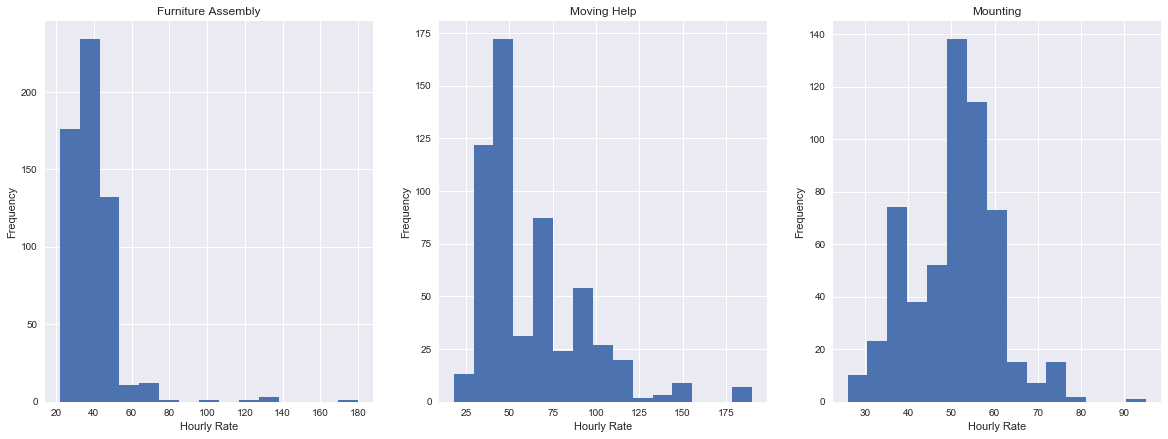

In [55]:
# 10. Based on the previous, how would you approach the question of:
#     How can we use market data to suggest hourly rates to Taskers that would
#     maximize their opportunity to be hired?
#     Please describe in detail, with code and formulas that support your model.
import seaborn as sns 
%matplotlib inline
sns.set()
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20, 7))
i = 1
for key, val in hourly_rate.items():
    plt.subplot(1, 3, i)
    plt.hist(np.array(val), bins = 15)
    plt.xlabel('Hourly Rate')
    plt.ylabel('Frequency')
    plt.title(key)
    i += 1
# Based on the results of question 9 and the histogram plots, the average hourly rates should be set around 40 for furniture assembly,
# 50 for moving help and 55 for for mounting